This is currently under construction.

This notebook contains the functions that are called inside the rubix pipeline.

# Config

contains all the information needed to run the pipeline. Those are run specfic configurations.

In [2]:
import os
config = {
    "pipeline":{"name": "calc_ifu"},
    
    "logger": {
        "log_level": "DEBUG",
        "log_file_path": None,
        "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    },
    "data": {
        "name": "IllustrisAPI",
        "args": {
            "api_key": os.environ.get("ILLUSTRIS_API_KEY"),
            "particle_type": ["stars"],
            "simulation": "TNG50-1",
            "snapshot": 99,
            "save_data_path": "data",
        },
        
        "load_galaxy_args": {
        "id": 12,
        "reuse": True,
        }
    },
    "simulation": {
        "name": "IllustrisTNG",
        "args": {
            "path": "data/galaxy-id-12.hdf5",
        },
    
    },
    "output_path": "output",

    "telescope":
        {"name": "MUSE",
         "psf": {"name": "gaussian", "size": 5, "sigma": 0.6},
         "lsf": {"sigma": 0.5},
         "noise": {"signal_to_noise": 1,"noise_distribution": "normal"},},
        
    "cosmology":
        {"name": "PLANCK15"},
        
    "galaxy":
        {"dist_z": 0.1,
         "rotation": {"type": "edge-on"},
        },
    "ssp": {
        "template": {
            "name": "BruzualCharlot2003"
        },
    },    
}

In [3]:
# NBVAL_SKIP
from rubix.core.data import convert_to_rubix, prepare_input

convert_to_rubix(config) # Convert the config to rubix format and store in output_path folder
rubixdata = prepare_input(config) # Prepare the input for the pipeline

2024-07-17 16:42:25,474 - rubix - INFO - 
   ___  __  _____  _____  __
  / _ \/ / / / _ )/  _/ |/_/
 / , _/ /_/ / _  |/ /_>  <  
/_/|_|\____/____/___/_/|_|  
                            

2024-07-17 16:42:25,475 - rubix - INFO - Rubix version: 0.0.post68+g83b3a1f.d20240716
2024-07-17 16:42:25,475 - rubix - INFO - Rubix galaxy file already exists, skipping conversion


{'pipeline': {'name': 'calc_ifu'}, 'logger': {'log_level': 'DEBUG', 'log_file_path': None, 'format': '%(asctime)s - %(name)s - %(levelname)s - %(message)s'}, 'data': {'name': 'IllustrisAPI', 'args': {'api_key': '05add2d69d501eb62014faa4dadb1af0', 'particle_type': ['stars'], 'simulation': 'TNG50-1', 'snapshot': 99, 'save_data_path': 'data'}, 'load_galaxy_args': {'id': 12, 'reuse': True}}, 'simulation': {'name': 'IllustrisTNG', 'args': {'path': 'data/galaxy-id-12.hdf5'}}, 'output_path': 'output', 'telescope': {'name': 'MUSE', 'psf': {'name': 'gaussian', 'size': 5, 'sigma': 0.6}, 'lsf': {'sigma': 0.5}, 'noise': {'signal_to_noise': 1, 'noise_distribution': 'normal'}}, 'cosmology': {'name': 'PLANCK15'}, 'galaxy': {'dist_z': 0.1, 'rotation': {'type': 'edge-on'}}, 'ssp': {'template': {'name': 'BruzualCharlot2003'}}}


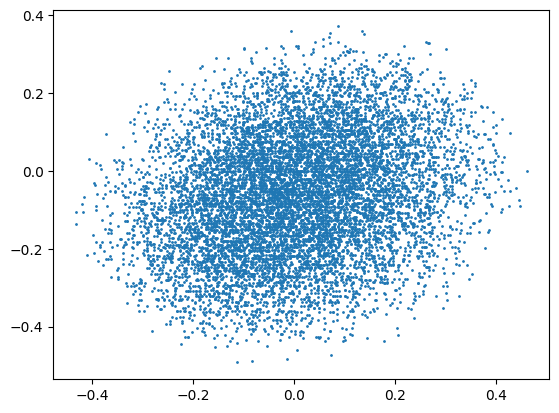

In [4]:
# NBVAL_SKIP
import matplotlib.pyplot as plt
# Make a scatter plot 
n_subset = 10000
subset = rubixdata.stars.coords[:n_subset]

plt.scatter(subset[:,0], subset[:,1], s=1)


Get the function that does the binning

In [5]:
from rubix.core.rotation import get_galaxy_rotation

In [6]:
print(rubixdata.stars.coords)

[[ 1.1718750e-02 -5.4687500e-02 -1.3671875e-02]
 [-2.9296875e-03 -6.2500000e-02 -1.1718750e-02]
 [ 6.8359375e-03 -7.8125000e-02 -3.9062500e-03]
 ...
 [-1.6905273e+01  4.7035156e+01 -1.7578125e+00]
 [-4.8350586e+01  3.6402344e+01 -1.5941406e+01]
 [-5.8808594e+00  5.5078125e+00  3.5298828e+01]]


In [7]:
rotate = get_galaxy_rotation(config)
rubixdata = rotate(rubixdata)

2024-07-17 16:42:41,932 - rubix - DEBUG - Roataion Type found: edge-on
2024-07-17 16:42:41,934 - rubix - INFO - Rotating galaxy with alpha=90, beta=0, gamma=0


In [8]:
print(rubixdata.stars.coords)

[[-2.2240153e-02 -3.7839931e-02  3.7262421e-02]
 [-3.7814379e-02 -4.0231191e-02  3.1681024e-02]
 [-4.4189490e-02 -4.0589456e-02  5.0648712e-02]
 ...
 [ 1.9538420e+01  2.0502863e+01 -4.1219749e+01]
 [-3.1623578e+00  2.1672578e+00 -6.2468727e+01]
 [-1.3442003e+01  3.3476887e+01  3.0884967e+00]]


In [9]:
from rubix.core.telescope import get_filter_particles
filter_particles = get_filter_particles(config)

rubixdata = filter_particles(rubixdata)

/home/annalena/rubix/rubix/telescope/factory.py:21: UserWarning: No telescope config provided, using default stored in /home/annalena/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(


In [10]:
# NBVAL_SKIP
from rubix.core.telescope import get_spaxel_assignment
bin_particles = get_spaxel_assignment(config)

rubixdata = bin_particles(rubixdata)

print(rubixdata.stars.pixel_assignment)
print(rubixdata.stars.spatial_bin_edges)

/home/annalena/rubix/rubix/telescope/factory.py:21: UserWarning: No telescope config provided, using default stored in /home/annalena/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(


[312 312 312 ... 624 454 600]
[-4.7619     -4.380948   -3.9999962  -3.6190443  -3.2380924  -2.8571405
 -2.4761887  -2.0952368  -1.7142849  -1.333333   -0.95238113 -0.57142925
 -0.19047737  0.19047451  0.5714264   0.9523783   1.3333302   1.714282
  2.095234    2.4761858   2.8571377   3.2380896   3.6190414   3.9999933
  4.380945    4.761897  ]


In [11]:
from rubix.core.data import get_reshape_data
reshape_data = get_reshape_data(config)

rubixdata = reshape_data(rubixdata)

In [12]:
from rubix.core.ifu import get_calculate_spectra
calcultae_spectra = get_calculate_spectra(config)

rubixdata = calcultae_spectra(rubixdata)
print(rubixdata.stars.spectra)

2024-07-17 16:43:00,589 - rubix - WARNING - python-fsps is not installed. Please install it to use this function. Install using pip install fsps and check the installation page: https://dfm.io/python-fsps/current/installation/ for more details. Especially, make sure to set all necessary environment variables.
2024-07-17 16:43:00,599 - rubix - DEBUG - Method not defined, using default method: cubic
2024-07-17 16:43:00,600 - rubix - INFO - Calculating IFU cube...
2024-07-17 16:43:00,601 - rubix - DEBUG - Input shapes: Metallicity: 1, Age: 1


2024-07-17 16:43:53,521 - rubix - DEBUG - Calculation Finished! Spectra shape: (1, 649384, 842)


[[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.3473026e-04
   3.2869022e-04 3.2401134e-04]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [2.6296914e-12 6.7535582e-12 1.2370240e-11 ... 5.4007218e-05
   5.3041127e-05 5.2069467e-05]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]]


In [13]:
from rubix.core.ifu import get_scale_spectrum_by_mass

scale_spectrum_by_mass = get_scale_spectrum_by_mass(config)

rubixdata = scale_spectrum_by_mass(rubixdata)
print(rubixdata.stars.spectra)

2024-07-17 16:44:01,501 - rubix - INFO - Scaling Spectra by Mass...


[[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.4532158e+01
   2.4089489e+01 2.3746576e+01]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [2.2606130e-07 5.8056929e-07 1.0634071e-06 ... 4.6427279e+00
   4.5596781e+00 4.4761491e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]]


In [14]:
from rubix.core.ifu import get_doppler_shift_and_resampling

doppler_shift_and_resampling = get_doppler_shift_and_resampling(config)

rubixdata = doppler_shift_and_resampling(rubixdata)
print(rubixdata.stars.spectra)

/home/annalena/rubix/rubix/telescope/factory.py:21: UserWarning: No telescope config provided, using default stored in /home/annalena/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
2024-07-17 16:44:07,313 - rubix - DEBUG - SSP Wave: (842,)
2024-07-17 16:44:07,774 - rubix - INFO - Doppler shifting and resampling stellar spectra...
2024-07-17 16:44:07,775 - rubix - DEBUG - Doppler Shifted SSP Wave: (1, 649384, 842)
2024-07-17 16:44:07,776 - rubix - DEBUG - Telescope Wave Seq: (3721,)


[[[   0.          0.          0.       ...    0.          0.
      0.      ]
  [ 272.66562   272.78925   272.91287  ...   67.22876    67.131256
     67.033745]
  [   0.          0.          0.       ...    0.          0.
      0.      ]
  ...
  [   0.          0.          0.       ...    0.          0.
      0.      ]
  [1248.9414   1247.7952   1246.6489   ...  101.735245  101.58377
    101.4323  ]
  [   0.          0.          0.       ...    0.          0.
      0.      ]]]


/home/annalena/rubix/rubix/telescope/factory.py:21: UserWarning: No telescope config provided, using default stored in /home/annalena/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
2024-07-17 16:45:17,763 - rubix - INFO - Getting rubix data...
2024-07-17 16:45:17,764 - rubix - INFO - Rubix galaxy file already exists, skipping conversion


{'pipeline': {'name': 'calc_ifu'}, 'logger': {'log_level': 'DEBUG', 'log_file_path': None, 'format': '%(asctime)s - %(name)s - %(levelname)s - %(message)s'}, 'data': {'name': 'IllustrisAPI', 'args': {'api_key': '05add2d69d501eb62014faa4dadb1af0', 'particle_type': ['stars'], 'simulation': 'TNG50-1', 'snapshot': 99, 'save_data_path': 'data'}, 'load_galaxy_args': {'id': 12, 'reuse': True}}, 'simulation': {'name': 'IllustrisTNG', 'args': {'path': 'data/galaxy-id-12.hdf5'}}, 'output_path': 'output', 'telescope': {'name': 'MUSE', 'psf': {'name': 'gaussian', 'size': 5, 'sigma': 0.6}, 'lsf': {'sigma': 0.5}, 'noise': {'signal_to_noise': 1, 'noise_distribution': 'normal'}}, 'cosmology': {'name': 'PLANCK15'}, 'galaxy': {'dist_z': 0.1, 'rotation': {'type': 'edge-on'}}, 'ssp': {'template': {'name': 'BruzualCharlot2003'}}}


2024-07-17 16:45:18,250 - rubix - INFO - Data loaded with 649384 star particles and 0 gas particles.
2024-07-17 16:45:18,252 - rubix - INFO - Data loaded with 48 properties.
2024-07-17 16:45:18,253 - rubix - DEBUG - Data: RubixData(galaxy=Galaxy(redshift=2.220446049250313e-16, center=array([11413.86337268, 35893.86374042, 32027.01940138]), halfmassrad_stars=7.727193253526112), stars=StarsData(coords=Array([[ 1.1718750e-02, -5.4687500e-02, -1.3671875e-02],
       [-2.9296875e-03, -6.2500000e-02, -1.1718750e-02],
       [ 6.8359375e-03, -7.8125000e-02, -3.9062500e-03],
       ...,
       [-1.6905273e+01,  4.7035156e+01, -1.7578125e+00],
       [-4.8350586e+01,  3.6402344e+01, -1.5941406e+01],
       [-5.8808594e+00,  5.5078125e+00,  3.5298828e+01]], dtype=float32), velocity=Array([[ 1.8367677e-16, -4.7929042e-17,  7.4227191e-17],
       [ 2.1569694e-18,  3.0625969e-16,  1.5955390e-16],
       [ 1.8713838e-16,  1.7605305e-16,  6.9643049e-17],
       ...,
       [ 3.0933031e-15, -4.6513599

[4700.15 4701.4  4702.65 ... 9347.65 9348.9  9350.15]
[0. 0. 0. ... 0. 0. 0.]


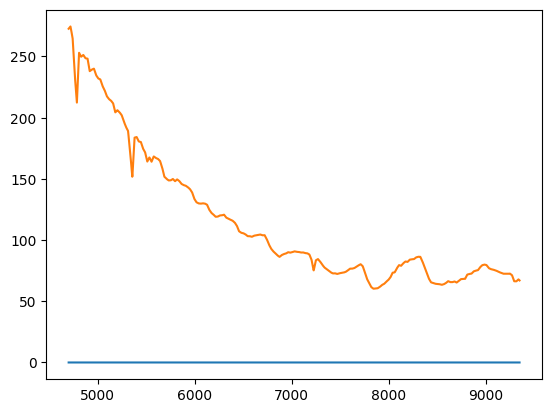

In [15]:
from rubix.core.pipeline import RubixPipeline 

pipe = RubixPipeline(config)

wave = pipe.telescope.wave_seq
print(wave)
print(rubixdata.stars.spectra[0][0][:])

plt.plot(wave, rubixdata.stars.spectra[0][0][:])
plt.plot(wave, rubixdata.stars.spectra[0][1][:])

In [16]:
from rubix.core.ifu import get_calculate_datacube
calculate_datacube = get_calculate_datacube(config)

rubixdata = calculate_datacube(rubixdata)
print(rubixdata.stars.datacube)

2024-07-17 16:45:22,992 - rubix - INFO - Calculating Data Cube...


2024-07-17 16:45:26,395 - rubix - DEBUG - Datacube Shape: (25, 25, 3721)
2024-07-17 16:45:26,403 - rubix - DEBUG - This is the datacube: [[[14108.82    14098.402   14087.983   ...  2429.1511   2421.7622
    2414.3726 ]
  [12496.415   12487.283   12478.151   ...  1661.5288   1656.5208
    1651.5126 ]
  [14963.875   14954.236   14944.596   ...  2324.1372   2317.5264
    2310.9153 ]
  ...
  [15318.616   15308.391   15298.165   ...  2207.773    2201.8442
    2195.9163 ]
  [ 5196.103    5193.3794   5190.6562  ...  1039.8348   1036.8125
    1033.7903 ]
  [11595.725   11588.365   11581.007   ...  2006.357    2001.3887
    1996.4204 ]]

 [[18379.71    18367.633   18355.549   ...  2993.912    2985.0767
    2976.2412 ]
  [14363.42    14354.31    14345.202   ...  2448.9282   2443.232
    2437.5352 ]
  [24778.568   24762.223   24745.877   ...  3971.8323   3961.1555
    3950.4783 ]
  ...
  [17410.418   17400.219   17390.016   ...  2527.2732   2520.3945
    2513.5159 ]
  [25992.23    25976.479   259

[[[14108.82    14098.402   14087.983   ...  2429.1511   2421.7622
    2414.3726 ]
  [12496.415   12487.283   12478.151   ...  1661.5288   1656.5208
    1651.5126 ]
  [14963.875   14954.236   14944.596   ...  2324.1372   2317.5264
    2310.9153 ]
  ...
  [15318.616   15308.391   15298.165   ...  2207.773    2201.8442
    2195.9163 ]
  [ 5196.103    5193.3794   5190.6562  ...  1039.8348   1036.8125
    1033.7903 ]
  [11595.725   11588.365   11581.007   ...  2006.357    2001.3887
    1996.4204 ]]

 [[18379.71    18367.633   18355.549   ...  2993.912    2985.0767
    2976.2412 ]
  [14363.42    14354.31    14345.202   ...  2448.9282   2443.232
    2437.5352 ]
  [24778.568   24762.223   24745.877   ...  3971.8323   3961.1555
    3950.4783 ]
  ...
  [17410.418   17400.219   17390.016   ...  2527.2732   2520.3945
    2513.5159 ]
  [25992.23    25976.479   25960.729   ...  3951.4917   3939.142
    3926.7932 ]
  [21429.639   21417.498   21405.36    ...  2482.054    2474.711
    2467.3682 ]]

 [[

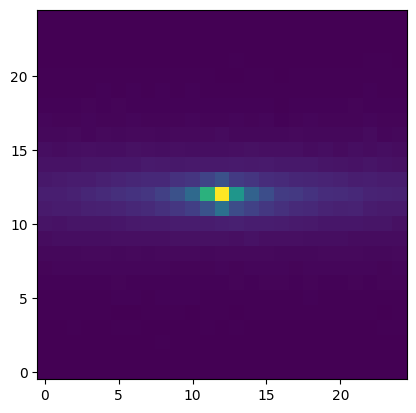

In [17]:
datacube = rubixdata.stars.datacube
img = datacube.sum(axis=2)
plt.imshow(img, origin="lower")

In [18]:
from rubix.core.psf import get_convolve_psf
convolve_psf = get_convolve_psf(config)

rubixdata = convolve_psf(rubixdata)

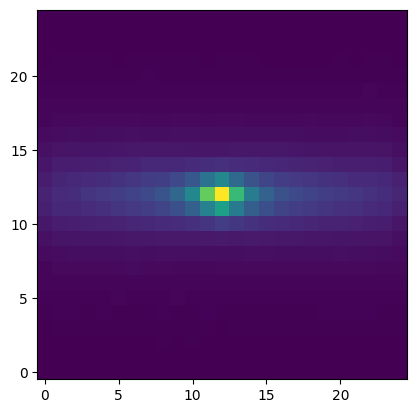

In [19]:
datacube = rubixdata.stars.datacube
img = datacube.sum(axis=2)
plt.imshow(img, origin="lower")

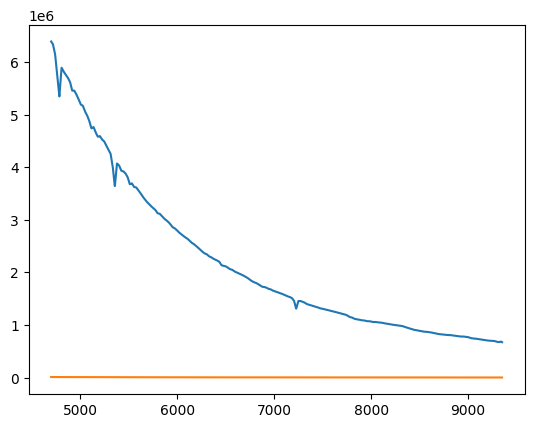

In [20]:
plt.plot(wave, datacube[12,12,:])
plt.plot(wave, datacube[0,0,:])

/home/annalena/rubix/rubix/telescope/factory.py:21: UserWarning: No telescope config provided, using default stored in /home/annalena/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
2024-07-17 16:46:00,536 - rubix - INFO - Convolving with LSF...


[[[ 9694.854  10095.961  10088.765  ...  1664.8314  1659.8446  1588.2279]
  [11099.295  11558.7    11550.663  ...  1729.8695  1724.9141  1650.6987]
  [12404.778  12918.647  12910.113  ...  1948.8785  1943.5358  1860.135 ]
  ...
  [10695.132  11138.408  11131.289  ...  1675.4419  1670.8799  1599.2086]
  [ 8854.648   9222.041   9216.561  ...  1502.0895  1497.7837  1433.3385]
  [ 8479.589   8831.339   8826.008  ...  1392.3428  1388.6329  1329.1436]]

 [[15168.68   15797.41   15787.356  ...  2571.9507  2564.3442  2453.7922]
  [17693.191  18426.295  18414.29   ...  2955.8372  2947.8503  2821.4595]
  [20863.904  21728.244  21713.934  ...  3248.6768  3240.154   3101.4668]
  ...
  [17580.578  18309.86   18298.814  ...  2719.0247  2711.341   2594.782 ]
  [19198.28   19994.9    19983.076  ...  2966.9934  2958.145   2830.5479]
  [16736.426  17431.174  17421.164  ...  2320.9465  2314.027   2214.2156]]

 [[22331.36   23257.988  23244.246  ...  3643.0112  3632.107   3475.4014]
  [27590.525  28733.86

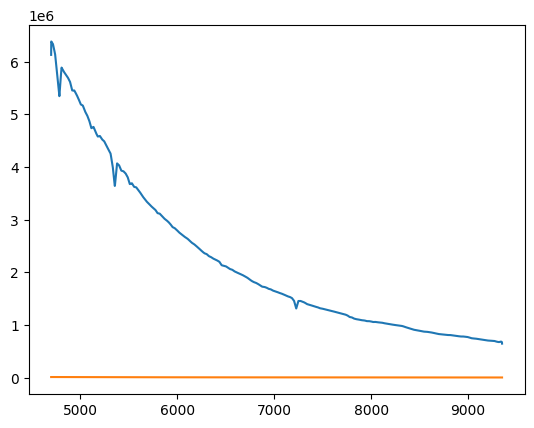

In [21]:
from rubix.core.lsf import get_convolve_lsf
convolve_lsf = get_convolve_lsf(config)

rubixdata = convolve_lsf(rubixdata)

plt.plot(wave, rubixdata.stars.datacube[12,12,:])
plt.plot(wave, rubixdata.stars.datacube[0,0,:])
print(rubixdata.stars.datacube)

2024-07-17 16:46:06,570 - rubix - INFO - Applying noise to datacube with signal to noise ratio: 1 and noise distribution: normal


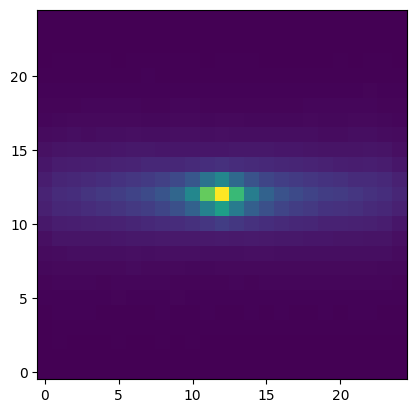

In [22]:
from rubix.core.noise import get_apply_noise

apply_noise = get_apply_noise(config)

rubixdata = apply_noise(rubixdata)

datacube = rubixdata.stars.datacube
img = datacube.sum(axis=2)
plt.imshow(img, origin="lower")

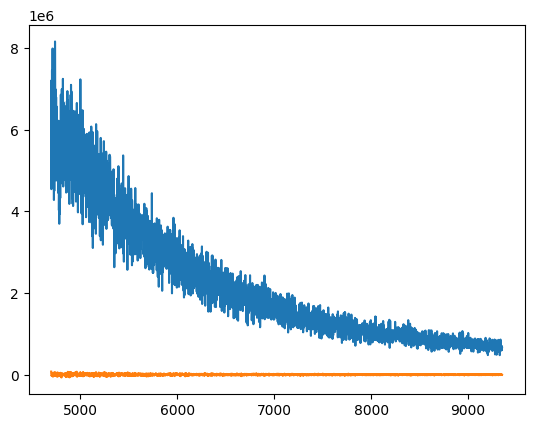

In [23]:
plt.plot(wave, rubixdata.stars.datacube[12,12,:])
plt.plot(wave, rubixdata.stars.datacube[0,0,:])